In [1]:
import sys
sys.path.append('..')
from src.model_support import *
from src import *
from src.models import RegressorEvaluatorModule, RegressorTest, rmse, rmse_err
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

C:\Users\mlovric\Anaconda3\envs\envphd\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\mlovric\Anaconda3\envs\envphd\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


# data

In [2]:
best_models = pd.read_csv('../results/all_results.csv', index_col=0)

In [3]:
best_models.index = pd.DatetimeIndex(best_models.index)

In [4]:
best_models.index

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', length=145, freq=None)

In [5]:
best_models.columns

Index(['D_NO_PRED', 'D_NO_TRUE', 'D_NO2_PRED', 'D_NO2_TRUE', 'D_PM10_PRED',
       'D_PM10_TRUE', 'N_NO_PRED', 'N_NO_TRUE', 'N_NO2_PRED', 'N_NO2_TRUE',
       'N_Ox_PRED', 'N_Ox_TRUE', 'N_O3_PRED', 'N_O3_TRUE', 'N_PM10_PRED',
       'N_PM10_TRUE', 'O_NO_PRED', 'O_NO_TRUE', 'O_NO2_PRED', 'O_NO2_TRUE',
       'O_PM10_PRED', 'O_PM10_TRUE', 'S_NO_PRED', 'S_NO_TRUE', 'S_NO2_PRED',
       'S_NO2_TRUE', 'S_Ox_PRED', 'S_Ox_TRUE', 'S_O3_PRED', 'S_O3_TRUE',
       'S_PM10_PRED', 'S_PM10_TRUE', 'W_NO_PRED', 'W_NO_TRUE', 'W_NO2_PRED',
       'W_NO2_TRUE', 'W_PM10_PRED', 'W_PM10_TRUE'],
      dtype='object')

In [6]:
targets = gases

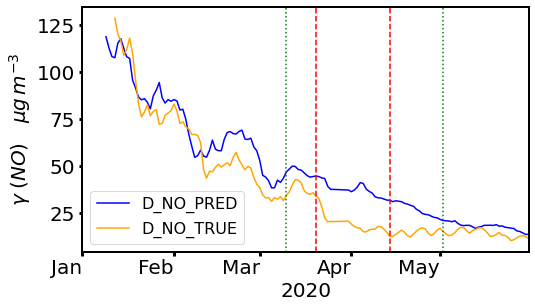

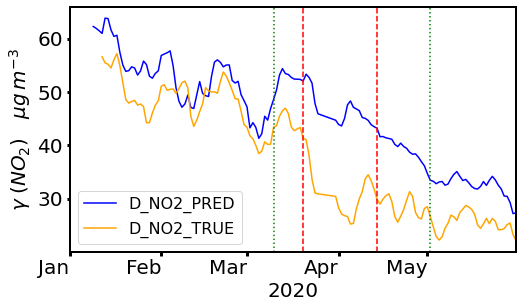

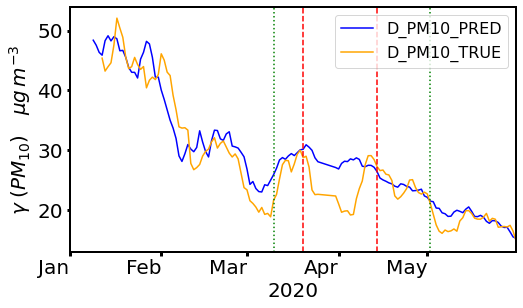

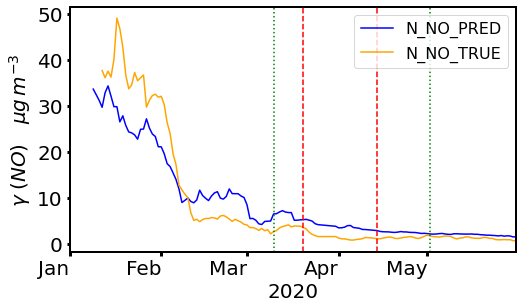

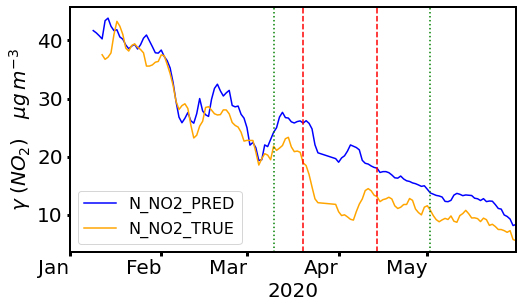

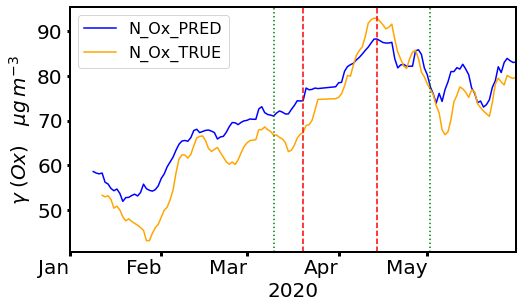

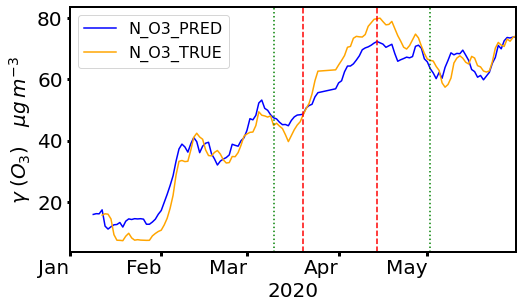

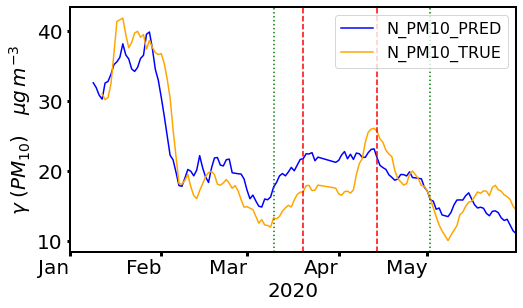

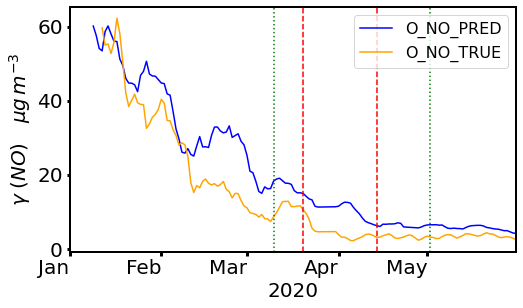

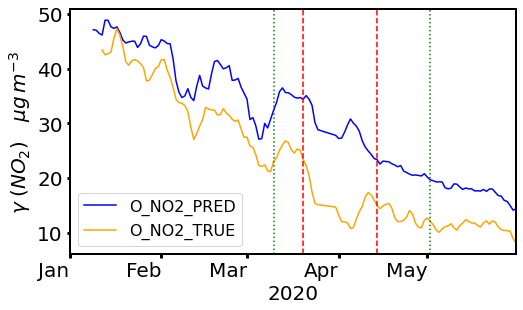

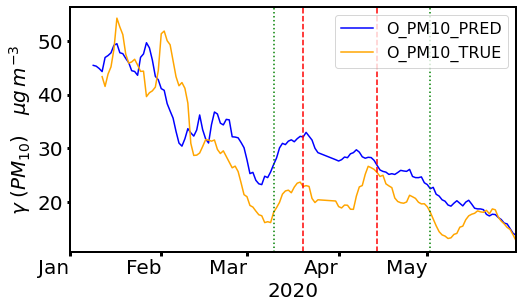

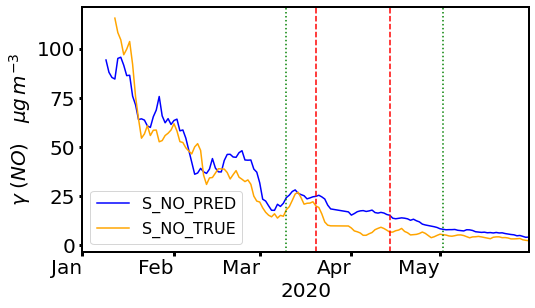

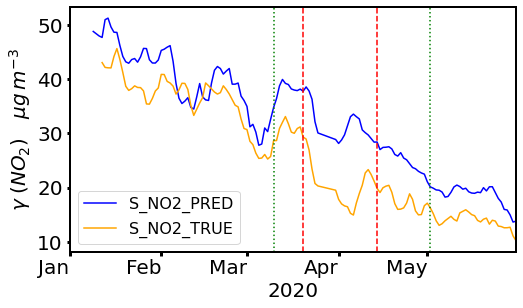

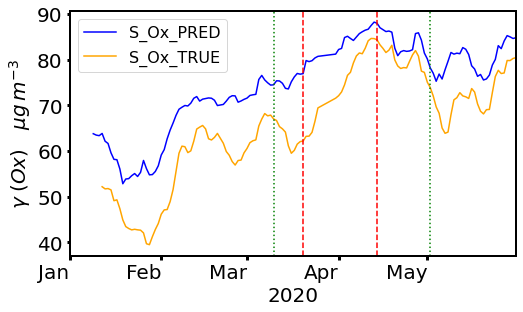

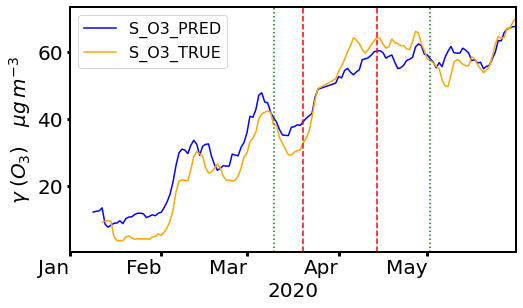

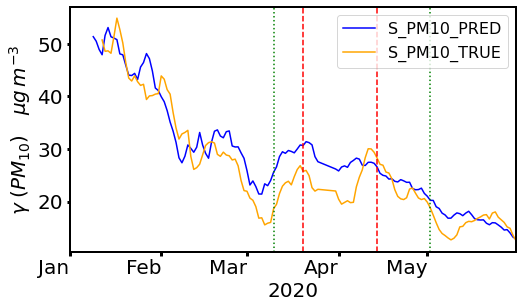

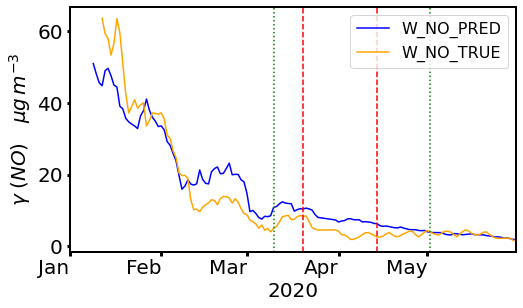

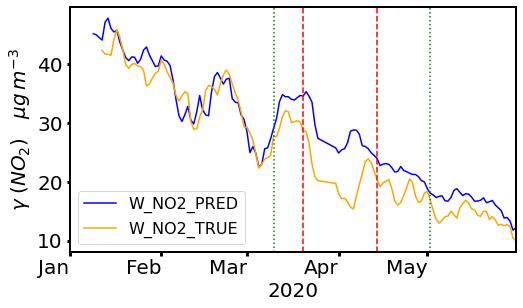

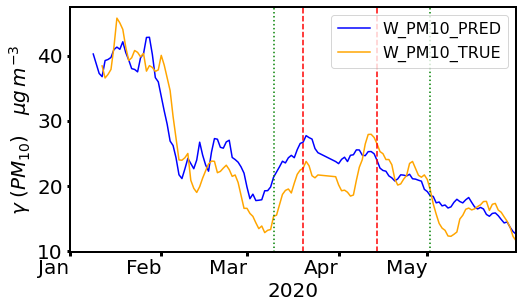

In [12]:
for j,i in enumerate(targets):
    
    y_predicted = best_models[i +  '_PRED']
    y_ext = best_models[i +  '_TRUE']

    ax = y_predicted.rolling(window=7).mean().plot(figsize=(8,5), c = 'b')
    y_ext.rolling(window=10).mean().plot(ax=ax, c = 'orange')
    #plt.title(i, fontdict = {'fontsize' : 20})
    
    #ax.set_ylabel('Value', size = 20)
    ax.set_xlabel('2020', size = 20)
    ax.tick_params(labelsize=20)
    
    plt.setp(ax.spines.values(), linewidth=2)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)

    l1 = ax.axvline(x='2020-03-10', c = 'g', linestyle=':')
    l2 = ax.axvline(x='2020-03-20', c = 'r', linestyle='--')
    l3 = ax.axvline(x='2020-04-14', c = 'r', linestyle='--')
    l4 = ax.axvline(x='2020-05-02', c = 'g', linestyle=':')
    
    plt.xticks(rotation = 0)
    plt.legend(fontsize = 16)
    
    ax.set(xlim=['01-01-2020', '31-05-2020'])
    
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    
    if 'O3' in i:
        plt.ylabel(r'$\gamma \;('+i[2]+'_{x}'.format(x=i[3])+')\quad \mu g \, m^{-3}$', fontsize=20)
        # ????????????????
        #plt.title(r''+i[0]+i[1]+i[2]+'_{x}'.format(x=i[3])+'')#+')\quad \mu g \, m^{-3}$', fontsize=20)
    elif 'NO2' in i:
        plt.ylabel(r'$\gamma \;('+i[2:4]+'_{x}'.format(x=i[4])+')\quad \mu g \, m^{-3}$', fontsize=20)
    elif 'PM10' in i:
        #plt.ylabel(r'$\gamma \;('+i[2:4]+'_{x}'.format(x=i[4:6])+')\quad \mu g \, m^{-3}$', fontsize=20)
        plt.ylabel(r'$\gamma \; (PM_{10})\quad \mu g \, m^{-3}$', fontsize=20)
    else:
        plt.ylabel(r'$\gamma \;('+i[2:]+')\quad \mu g \, m^{-3}$', fontsize=20)
            
    #plt.savefig(r'C:\Users\kpavlovic\Nextcloud\2020_covidair\06_figures\{y}.png'.format(y=i))

    plt.show()